In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv('wines_SPA.csv')

In [5]:
df.shape

(7500, 11)

In [6]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [7]:
df.sample(15)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
6992,Matsu,El Viejo,2019,4.2,400,Espana,Toro,27.89,Toro Red,5.0,3.0
253,Allende,Aurus,2005,4.6,95,Espana,Rioja,136.00,Rioja Red,4.0,3.0
6254,Sierra Cantabria,Coleccion Privada,2012,4.2,420,Espana,Rioja,28.30,Rioja Red,4.0,3.0
4565,Ramon Bilbao,Mirto,2011,4.2,402,Espana,Rioja,28.53,Rioja Red,4.0,3.0
1933,VALENCISO,Rioja Reserva,2014,4.2,696,Espana,Rioja,19.40,Rioja Red,4.0,3.0
6722,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
4734,Vina Pedrosa,Gran Reserva,2011,4.2,410,Espana,Ribera del Duero,51.35,Ribera Del Duero Red,5.0,3.0
2593,Contino,Rioja Graciano,2011,4.2,395,Espana,Rioja,61.94,Rioja Red,4.0,3.0
5108,Bodegas La Horra,Corimbo I,2015,4.2,412,Espana,Ribera del Duero,37.90,Ribera Del Duero Red,NaN,NaN
3643,Contino,Rioja Graciano,2011,4.2,395,Espana,Rioja,61.94,Rioja Red,4.0,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [9]:
df['year']=df['year'].replace('N.V.', pd.NA)
df['year']=df['year'].fillna(df['year'].mode()[0])
df['year']=df['year'].astype(int)

In [10]:
df.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


In [11]:
df.describe()

,year,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,2013.399333,4.254933,451.109067,60.095822,4.158427,2.946612
std,6.821921,0.118029,723.001856,150.356676,0.583352,0.248202
min,1910.000000,4.200000,25.000000,4.990000,2.000000,1.000000
25%,2011.000000,4.200000,389.000000,18.900000,4.000000,3.000000
50%,2015.000000,4.200000,404.000000,28.530000,4.000000,3.000000
75%,2017.000000,4.200000,415.000000,51.350000,5.000000,3.000000
max,2021.000000,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [12]:
df.duplicated().sum()

np.int64(5452)

In [13]:
df=df.drop_duplicates()

In [14]:
df.loc[:,'acidity']=df.groupby('wine')['acidity'].transform(lambda x:x.fillna(x.median()))

In [15]:
df.loc[:,'body']=df.groupby('wine')['body'].transform(lambda x:x.fillna(x.median()))

In [16]:
df.loc[:,'acidity']=df['acidity'].fillna(df['acidity'].mean())

In [17]:
df.loc[:,'body']=df['body'].fillna(df['body'].mean())

In [18]:
df=df.dropna(subset=['year'])

In [19]:
df.loc[:,'type'] = df.groupby('wine')['type'].transform(lambda x:x.fillna(x.mode()))


In [20]:
df=df.dropna(subset=['type'])

In [21]:
df.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,0
body,0


In [22]:
df = df.drop(columns=['country'])

In [23]:
df['type'].nunique()

21

In [24]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [25]:
df.sample(5)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
6100,Remirez de Ganuza,Rioja Blanco,2017,4.2,421,Rioja,29.15,13,3.0,3.0
121,Vega Sicilia,Unico,1953,4.7,89,Ribera del Duero,1207.60,11,5.0,3.0
252,Bodegas Vilano,Tinto,2019,4.6,97,Ribera del Duero,43.50,11,5.0,3.0
1099,Edra,Merlot - Syrah,2016,4.4,27,Ribera del Gallego-Cinco Villas,11.50,10,4.0,3.0
1106,Guillem Carol - Cellers Carol Valles,Cava Gran Reserva Familiar Millenium Brut,2011,4.4,27,Cava,29.95,2,2.0,3.0


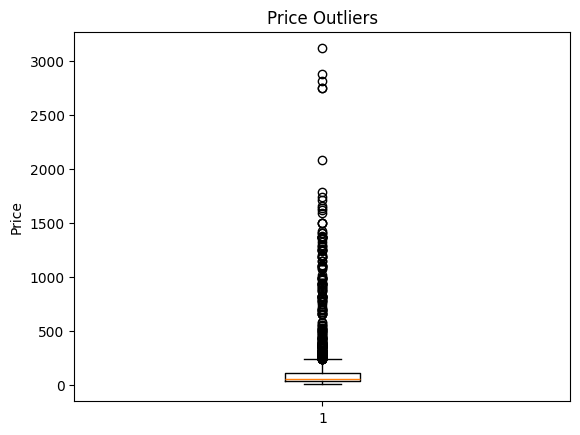

In [26]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.ylabel("Price")
plt.show()

In [27]:
lower_percentile=0.1
upper_percentile=0.9
lower_bound=df['price'].quantile(lower_percentile)
upper_bound=df['price'].quantile(upper_percentile)

In [28]:
df['price']=np.where(df['price']>upper_bound,upper_bound,df['price'])
df['price']=np.where(df['price']<lower_bound,lower_bound,df['price'])

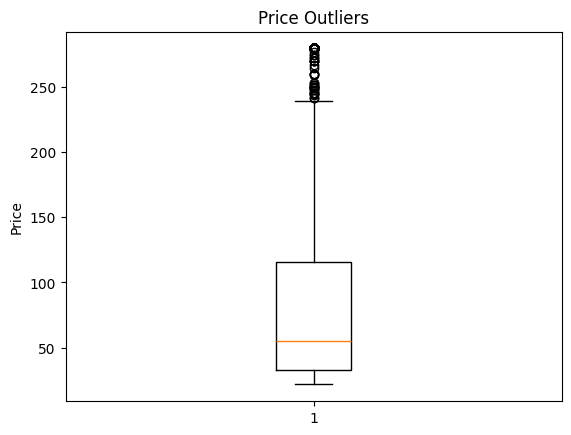

In [29]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.ylabel("Price")
plt.show()

In [30]:
df.sample(15)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
1028,Martinet,Cami Pesseroles,2017,4.4,42,Priorato,75.50,9,4.0,3.0
1184,Pago de Los Capellanes,Crianza Tinto,2019,4.3,1011,Ribera del Duero,21.60,11,5.0,3.0
299,Vega Sicilia,Valbuena 5o,1979,4.6,46,Ribera del Duero,195.00,11,5.0,3.0
733,Ordonez,Vatan Tinta de Toro,2017,4.4,498,Toro,55.31,19,5.0,3.0
660,Tomas Postigo,3er Ano Ribera del Duero Tinto,2018,4.4,1842,Ribera del Duero,27.75,11,5.0,3.0
405,Vina Sastre,Pago de Santa Cruz,2016,4.5,501,Ribera del Duero,75.95,11,5.0,3.0
924,Bodegas Vilano,Premium,2018,4.4,79,Ribera del Duero,35.00,11,5.0,3.0
1998,Castano,Casa Cisca Monastrell,2011,4.2,423,Yecla,32.00,6,5.0,3.0
1012,Olivier Riviere,Pozo Alto,2016,4.4,48,Rioja,119.95,12,4.0,3.0
532,Bodegas Mas Alta,La Creu Alta,2015,4.5,73,Priorato,234.98,9,4.0,3.0


In [31]:
df.head(25)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,279.68000,19,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,279.68000,18,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,279.68000,11,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,279.68000,11,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,279.68000,11,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Ribera del Duero,279.68000,11,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Ribera del Duero,279.68000,11,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Ribera del Duero,279.68000,11,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Ribera del Duero,279.68000,11,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Ribera del Duero,279.68000,11,5.0,3.0


In [32]:
pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4aa1bb1e8a1fbaab9f3a17aa60630fc138a5c713f87ea92269f9fe30878d2e91
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [33]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df, explorative=True)
profile.to_file("eda_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 36.82it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
df_new=df[['price','rating','year']]

In [38]:
df_new.sample(15)

,price,rating,year
1573,75.00,4.3,1985
297,114.95,4.6,2018
460,80.95,4.5,2016
741,38.30,4.4,2018
188,279.68,4.6,2005
870,279.68,4.4,2011
585,77.50,4.5,2016
453,34.90,4.5,2019
38,279.68,4.8,2008
775,141.00,4.4,1996


In [39]:
df_new['price'].skew()

np.float64(1.350660579447187)

In [40]:
df_new['year'].skew()

np.float64(-3.728591681296665)

In [41]:
df_new['rating'].skew()

np.float64(0.767186404714039)

In [47]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [54]:
pt=PowerTransformer(method='yeo-johnson')
df_new[["rating_transformed","year_transformed"]]=pt.fit_transform(df_new[["rating","year"]])
scaler=StandardScaler()
df_new[["rating_standardized","year_standardized","price"]]=scaler.fit_transform(df_new[["rating_transformed","year_transformed","price"]])

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
<ipython-input-54-38a6f749e4be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[["rating_transformed","year_transformed"]]=pt.fit_transform(df_new[["rating","year"]])
<ipython-input-54-38a6f749e4be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [57]:
df_new.drop(columns=["rating","year","rating_transformed","year_transformed"])

,price,rating_standardized,year_standardized
0,2.300707,2.283293,0.137237
1,2.300707,2.283293,0.837964
2,2.300707,2.026307,-0.368631
3,2.300707,2.026307,-1.448340
4,2.300707,2.026307,-1.726873
...,...,...,...
2046,-0.805214,-1.718563,0.691371
2047,-0.317841,-1.718563,-0.121464
2048,-0.717840,-1.718563,0.548074
2049,-0.214404,-1.718563,-0.830355


In [60]:
X=df_new.drop(columns=["price"])
y=df_new["price"]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
models={
    "XGBoost":XGBRegressor(n_estimators=100,learning_rate=0.1,random_state=42),
    "Random Forest":RandomForestRegressor(n_estimators=100,random_state=42),
    "LightGBM":LGBMRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
}
results = {}

In [64]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test, y_pred)
    r2=r2_score(y_test, y_pred)
    results[name]={"RMSE":rmse,"MAE":mae,"R² Score":r2}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 1553, number of used features: 6
[LightGBM] [Info] Start training from score 0.003177


In [65]:
results_df=pd.DataFrame(results).T
print(results_df)

                   RMSE       MAE  R² Score
XGBoost        0.660709  0.452551  0.534379
Random Forest  0.670723  0.455766  0.520157
LightGBM       0.645696  0.446123  0.555298


In [71]:
rf_params={
    'n_estimators': [100,200,300,500],
    'max_depth':[10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt']
}
rf=RandomForestRegressor(random_state=42)
rf_grid=RandomizedSearchCV(rf,rf_params,cv=5,n_iter=20,scoring='r2',n_jobs=-1,random_state=42)
rf_grid.fit(X_train,y_train)
print("Random Forest R² Score:",r2_score(y_test,rf_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Random Forest R² Score: 0.5558921965040404


In [72]:
xgb_params={
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'max_depth':[3,5,7,10],
    'subsample':[0.7,0.8,0.9],
    'colsample_bytree':[0.7,0.8,0.9],
}
xgb=XGBRegressor(objective='reg:squarederror',random_state=42)
xgb_grid=RandomizedSearchCV(xgb,xgb_params,cv=5,n_iter=20,scoring='r2',n_jobs=-1,random_state=42)
xgb_grid.fit(X_train,y_train)
print("XGBoost R² Score:",r2_score(y_test, xgb_pred))

XGBoost R² Score: 0.5964050438948317


In [73]:
lgb_params={
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'num_leaves':[20,30,40,50],
    'max_depth':[3,5,7,10],
    'subsample':[0.7,0.8,0.9],
    'colsample_bytree':[0.7,0.8,0.9],
}
lgb=LGBMRegressor(random_state=42)
lgb_grid=RandomizedSearchCV(lgb,lgb_params,cv=5,n_iter=20,scoring='r2',n_jobs=-1,random_state=42)
lgb_grid.fit(X_train,y_train)
print("LightGBM R² Score:",r2_score(y_test, lgb_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 1553, number of used features: 6
[LightGBM] [Info] Start training from score 0.003177
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be